In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

sns.set()

In [107]:
datasets = ['A-n32-k5', 'A-n46-k7', 'A-n61-k9']
bests = {'A-n32-k5': 784, 'A-n46-k7': 914, 'A-n61-k9': 1034}
colnames = ['ModelName', 'Iterations', 'PopulationSize', 'TournamentSize', 'CrossoverProbability', 'MutationProbability', 'SolutionValue']

In [108]:
import math

for dataset in datasets:
    df = pd.read_csv(f'Results/{dataset}_CrossoverMutationProbability_results.csv', header=None)
    df.columns = colnames
    results = np.zeros(shape=(11, 11))
    for res in df.itertuples():
        x = res.CrossoverProbability
        y = res.MutationProbability
        results[int(10*x), int(10*y)] = res.SolutionValue
    
    labels = np.arange(0, 1.1, 0.1).tolist()
    labels = [round(x, 1) for x in labels]
    results = pd.DataFrame(results, index = labels, columns = labels)
    fig, ax = plt.subplots(figsize=(12, 6))  

    ax = sns.heatmap(results, annot=True, fmt='g', cmap="YlGnBu")
    column_max = results.idxmin(axis=0)
    best_res = 15235235
    for col, variable in enumerate(labels):
        position = results.index.get_loc(column_max[variable])
        if best_res > results.iloc[col, position]:
            best_ids = (col, position)
            best_res =  results.iloc[col, position]
    ax.add_patch(Rectangle(best_ids, 1, 1, fill=False, edgecolor='red', lw=3))
    plt.xlabel('Prawdopodobienstwo mutacji')
    plt.ylabel('Prawdopodobienstwo krzyzowania')
    
    plt.show()
    #print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'Results/A-n32-k5_CrossoverMutationProbability_results.csv'

POPULATION SIZE

[100, 200, 500, 1000] [1060.3286506072127, 1046.6813907165754, 1034.7518625048122, 1033.700094282034]


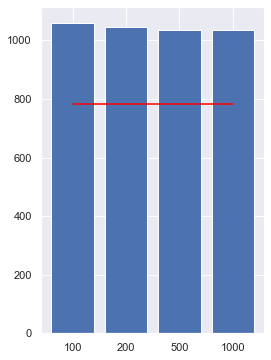

[100, 200, 500, 1000] [1222.0916764454155, 1241.110670136094, 1232.3892660881943, 1210.5564720691973]


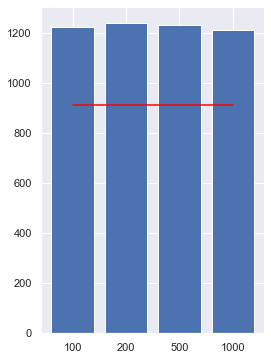

[100, 200, 500, 1000] [1583.9845620526178, 1523.7538833089218, 1486.7411635563749, 1474.572135722301]


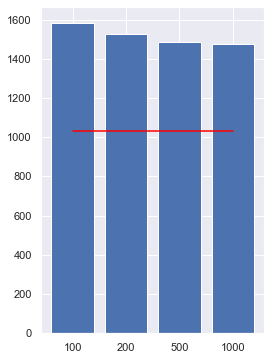

In [119]:
for dataset in datasets:
    df = pd.read_csv(f'Results/{dataset}_PopulationSize_results.csv', header=None)
    df.columns = colnames
    x = []
    y = []
    for row in df.itertuples():
        x.append(row.PopulationSize)
        y.append(row.SolutionValue)
    
    print(x, y)
    #plt.plot(x, y, 'o')
    fig, ax = plt.subplots(figsize=(4,6))
    plt.bar([0,1,2,3], y)
    plt.xticks(range(len(x)), x)
    
    xx = [0,1,2,3]
    yy = [bests[dataset] for _ in range(4)]
    #plt.twinx()
    plt.plot(xx, yy, color='red')
    #axes2.plot(xx, yy, color='k', label='Sine')
    #axes2.set_ylim(-1, 1)
    #axes2.set_ylabel('Line plot')
    
    #plt.xticks(x)#np.arange(min(x), max(x) + 1, 1.0))
    plt.show()

Turniej

[1, 2, 16, 64, 250, 500] [1979.174993238396, 1563.3743393583431, 1374.2439791569377, 1276.8725825232366, 1227.8384412139872, 1203.4875856753135]


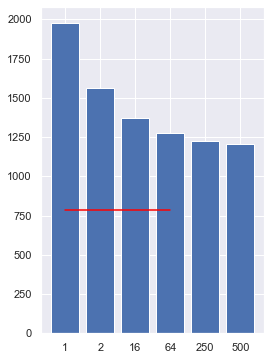

[1, 2, 16, 64, 250, 500] [2473.672465719084, 1975.73612682496, 1721.8079360676286, 1587.3467089640528, 1503.1297999426113, 1455.5487090176714]


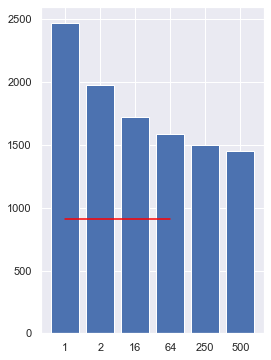

[1, 2, 16, 64, 250, 500] [2976.76858251494, 2414.0831463713434, 2088.846169774481, 1914.65551455512, 1812.9523472115136, 1748.2889105161757]


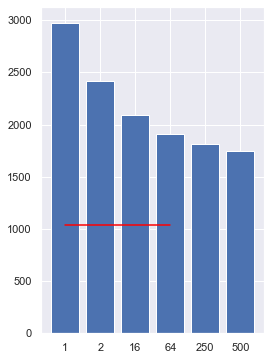

In [122]:
for dataset in datasets:
    df = pd.read_csv(f'Results/{dataset}_TournamentSize_results.csv', header=None)
    df.columns = colnames
    x = []
    y = []
    for row in df.itertuples():
        x.append(row.TournamentSize)
        y.append(row.SolutionValue)
    
    print(x, y)
    #plt.plot(x, y, 'o')
    fig, ax = plt.subplots(figsize=(4,6))
    plt.bar([0,1,2,3,4,5], y)
    plt.xticks(range(len(x)), x)
    
    xx = [0,1,2,3]
    yy = [bests[dataset] for _ in range(4)]
    #plt.twinx()
    plt.plot(xx, yy, color='red')
    #axes2.plot(xx, yy, color='k', label='Sine')
    #axes2.set_ylim(-1, 1)
    #axes2.set_ylabel('Line plot')
    
    #plt.xticks(x)#np.arange(min(x), max(x) + 1, 1.0))
    plt.show()

Porównanie algorytmów

['genetic', 'greedy', 'randomSearch'] [1133.9897858155189, 2202.14311274074, 2117.0792896546045]


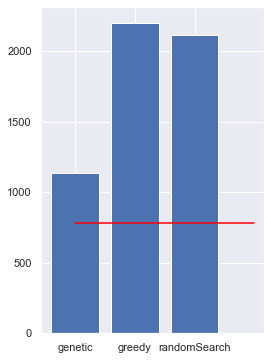

['genetic', 'greedy', 'randomSearch'] [1192.5475741801963, 2334.6744007893008, 2337.9213734228747]


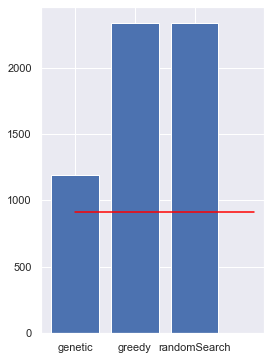

['genetic', 'greedy', 'randomSearch'] [1282.513315068142, 2490.8194591001698, 2659.243281598506]


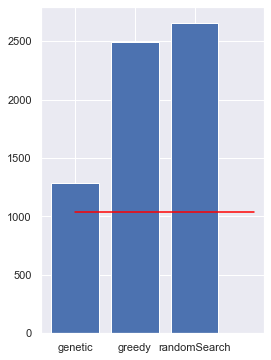

In [126]:
for dataset in datasets:
    df = pd.read_csv(f'Results/{dataset}_AlgsComparison_results.csv', header=None)
    df.columns = colnames
    x = []
    y = []
    for row in df.itertuples():
        x.append(row.ModelName)
        y.append(row.SolutionValue)
    
    print(x, y)
    #plt.plot(x, y, 'o')
    fig, ax = plt.subplots(figsize=(4,6))
    plt.bar([0,1,2], y)
    plt.xticks(range(len(x)), x)
    
    xx = [0,1,2,3]
    yy = [bests[dataset] for _ in range(4)]
    #plt.twinx()
    plt.plot(xx, yy, color='red')
    #axes2.plot(xx, yy, color='k', label='Sine')
    #axes2.set_ylim(-1, 1)
    #axes2.set_ylabel('Line plot') + 1, 1.0))
    plt.show()